<a href="https://colab.research.google.com/github/FloSFS/CEA_Simulados/blob/main/CEA_Simulados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para usar se conecte no Drive e garanta que tem acesso a seguinte pasta: [CEA_Simulado](https://drive.google.com/drive/folders/1EAejeMPJpSTachpdoHY5MTdu4Szus2N0?usp=sharing).

As questões a seguir são do simulado do [Rafael Toro 2024](https://www.academiarafaeltoro.com.br/materiais/simulado-gratuito-cea/), que contêm ao todo 420 questões.

Em andamento:
  - Não tem a explicação do gabarito, seja livre para incluir sua prórpia explicação como forma de estudo
  - Não há uma separação de assuntos, seja livre para incluir o assunto caso queira um estudo mais focado
  - Ainda estou trabalhando na interface para uma melhor leitura das questões.

Avisos:
- Antes de usar, atualize "conectar a base" pelo seu caminho no Drive
- Inclua a pasta no seu Drive: '/content/drive/MyDrive/CEA_Simulado' para que não tenha problema com o caminho das imagens.


Quer ver meu portifólio? [clique aqui!](https://luanastoppa100.wixsite.com/luanastoppadatascien)

# Rodar

In [ ]:
!pip install google.colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Install e Imports

In [ ]:
!pip install pandas
!pip install random
!pip install os
!pip install IPython


ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [ ]:
import pandas as pd

from google.colab import files
import random
import pandas as pd
from IPython.display import Image, display
from IPython.display import Image
import os

## Conectar a base

In [ ]:
# Substitua pelo caminho do seu DRIVE!
file_path_drive = '/content/drive/MyDrive/dadosbot/CEA_Simulado/Base_CEA_Simulados.xlsx'
simulado = 'Base_CEA_Simulados.xlsx'
!cp "{file_path_drive}" "{simulado}"
df = pd.read_excel(simulado)
print(df.head())

#Apaga o arquivo local
#!rm "{}"

    id  questao                                           pergunta imagem  \
0  1_1        1  O órgão responsável pelo controle e fiscalizaç...    NaN   
1  2_1        2  Segundo a Lei Complementar nº 179, de 24 de fe...    NaN   
2  3_1        3  Segundo o Código ANBIMA de Distribuição de Pro...    NaN   
3  4_1        4  Segundo o Código Anbima de Distribuição de Pro...    NaN   
4  5_1        5  São considerados indícios do crime de lavagem ...    NaN   

                                              opcoes resposta explicação?  \
0  a) a CVM - Comissão de Valores Mobiliários. b)...        c    Em falta   
1  a) Conselho Monetário Nacional b) Superior Tri...        d    Em falta   
2  a) da Caderneta de Poupança. b) dos Títulos Pú...        a    Em falta   
3  a) fundos de investimento. b) fundos de invest...        a    Em falta   
4  a) I, apenas. b) II, apenas. c) I e II. d) Nen...        c    Em falta   

  assunto  ex_simulado link  
0   Todos            1  NaN  
1   Todos     

## Funções

In [ ]:
from google.colab import drive
from IPython.display import Image
import time
#teste de imagem por caminho 7.0 - trabalhando com base no 2

def mostrar_assuntos():
    assuntos = df['assunto'].unique().tolist()
    print("Assuntos disponíveis:")
    for i, assunto in enumerate(assuntos):
        print(f"{i+1}. {assunto}")
    return assuntos


def selecionar_questoes(assunto, num_questoes):
    df_assunto = df[df['assunto'] == assunto]
    if len(df_assunto) < num_questoes:
        print(f"Não há {num_questoes} questões suficientes sobre '{assunto}'. Selecionando todas as disponíveis.")
        ids_questoes = df_assunto['id'].tolist()
    else:
        ids_questoes = random.sample(df_assunto['id'].tolist(), num_questoes)
    return ids_questoes

def exibir_opcoes(opcoes):
    opcoes_lista = [opcao.strip() for opcao in opcoes.split(';')]  # Remove espaços extras
    opcoes_combinadas = " ".join(opcoes_lista)  # Junta as opções com espaços
    print(opcoes_combinadas)

def fazer_quiz(ids_questoes):
    acertos = 0
    respostas_usuario = []
    respostas_erradas = []

    print("Entrando na função fazer_quiz")  # Adicionado para depuração
    print(f"IDs das questões: {ids_questoes}")  # Adicionado para depuração

    for questao_id in ids_questoes:
        print(f"Questão ID: {questao_id}")
        questao = df[df['id'] == questao_id]
        pergunta = questao['pergunta'].iloc[0]
        resposta_correta = questao['resposta'].iloc[0]
        opcoes = questao['opcoes'].iloc[0]
        explicacao = questao['explicação?'].iloc[0]
        imagem_path = questao['imagem'].iloc[0]

        print("\nPergunta:")
        print(pergunta)

        # Verifica e exibe a imagem - CORRIGIDO: agora está DENTRO do loop for
        if pd.notnull(imagem_path) and isinstance(imagem_path, str):
            try:
                if os.path.exists(imagem_path):
                    display(Image(filename=imagem_path))
                    time.sleep(3)  # Espera 3 segundos. Ajuste conforme necessário.
                else:
                    print(f"Aviso: Imagem não encontrada em: {imagem_path}") # link removido por falta de definição.
            except Exception as e:
                print(f"Erro ao exibir imagem: {e}")

        exibir_opcoes(opcoes)

        while True:  # loop para entrada válida
            try:
                resposta_usuario = input("Escolha a opção (a, b, c ou d): ").lower().strip()
                if resposta_usuario in ['a', 'b', 'c', 'd']:
                    break
                else:
                    print("Opção inválida. Por favor, escolha a, b, c ou d.")
            except ValueError:  # Captura erros de entrada
                print("Entrada inválida. Por favor, digite apenas uma letra (a, b, c ou d).")

        # Adiciona a resposta APENAS UMA VEZ aqui
        respostas_usuario.append({
            'id': questao_id,
            'pergunta': pergunta,
            'resposta_correta': resposta_correta,
            'resposta_usuario': resposta_usuario,
            'opcoes': opcoes,
            'explicacao': explicacao,
            'imagem': imagem_path
        })

        if resposta_usuario == resposta_correta.lower():
            print("Resposta correta!")
            acertos += 1
        else:
            print(f"Resposta incorreta. A resposta correta era: {resposta_correta}")
            respostas_erradas.append({
                'pergunta': pergunta,
                'resposta_correta': resposta_correta,
                'resposta_usuario': resposta_usuario,
                'opcoes': opcoes,
                'explicacao': explicacao,
                'imagem': imagem_path
            })

    print(f"\nVocê acertou {acertos} de {len(ids_questoes)} questões.")

    # Mostrando as explicações das respostas erradas:
    if respostas_erradas:
        print("\nExplicações das respostas erradas:")
        for resposta_errada in respostas_erradas:
            print(f"\nPergunta: {resposta_errada['pergunta']}")
            print(f"Opções: {resposta_errada['opcoes']}")
            print(f"Sua resposta: {resposta_errada['resposta_usuario']}")
            print(f"Resposta correta: {resposta_errada['resposta_correta']}")
            print(f"Explicação: {resposta_errada['explicacao']}")
    else:
        print("\nVocê não errou nenhuma questão!")

    return respostas_usuario


## Salvando suas respostas (opcional)

In [ ]:
# Salvando as respostas - Aqui você pode copiar esse código sem o # e colocar dentro do quiz após a linha de "resposta = fazer_quiz(id_questoes)"

#df_respostas = pd.DataFrame(respostas)
#df_respostas.to_csv('respostas_quiz.csv', index=False, encoding='utf-8')
#print("\nRespostas salvas em 'respostas_quiz.csv'")


Respostas salvas em 'respostas_quiz.csv'


# Quiz

Assuntos disponíveis:
1. Todos
Escolha o número do assunto: 1
Quantas questões você quer responder? 5
Entrando na função fazer_quiz
IDs das questões: ['43_5', '33_2', '3_1', '58_3', '41_3']
Questão ID: 43_5

Pergunta:
Para o investidor pessoa física que faz a sua declaração de imposto de renda pelo modelo simplificado, o percentual máximo de contribuição em um PGBL sobre a renda bruta a ser lançado para dedução da base de cálculo de IR será de:
a) 0% b) 10% c) 12% d) 20%
Escolha a opção (a, b, c ou d): b
Resposta incorreta. A resposta correta era: a
Questão ID: 33_2

Pergunta:
Sobre o Fundo de Investimento Imobiliário (FII): I – As classes de cotas devem ser constituídas em regime fechado e podem ter prazo de duração indeterminado. II – Pode ser objeto de oferta para investidores de varejo ou qualificados. III – Pode adquirir a participação em empreendimentos imobiliários, por meio de Letra Hipotecária (LH), Letra de Crédito Imobiliário (LCI) e Certificados de Recebíveis Imobiliários (

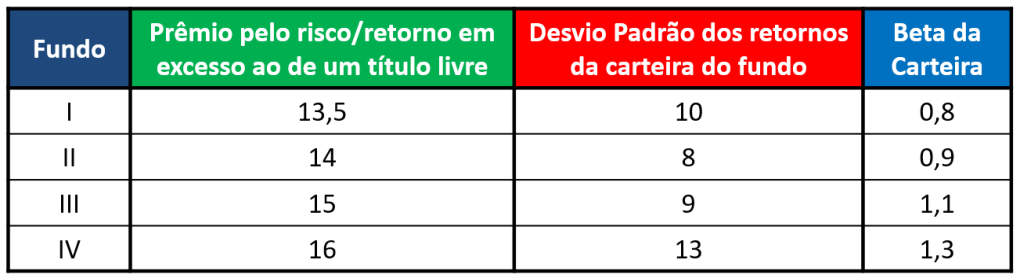

a) I b) II c) III d) IV
Escolha a opção (a, b, c ou d): c
Resposta incorreta. A resposta correta era: a
Questão ID: 41_3

Pergunta:
Um senhor com 60 anos quer contratar um Plano complementar de previdência, realizando um aporte único e desejando obter uma renda vitalícia. Esse plano de previdência:
a) pode ser contratado, indiferentemente do plano de previdência escolhido, pois os mesmos não possuem limite de idades. b) não pode ser contratado, pois a idade do investidor ultrapassa a idade máxima para tal investimento. c) pode contratar, tendo em vista que é renda vitalícia. d) depende do tipo de plano contratado.
Escolha a opção (a, b, c ou d): a
Resposta correta!

Você acertou 1 de 5 questões.

Explicações das respostas erradas:

Pergunta: Para o investidor pessoa física que faz a sua declaração de imposto de renda pelo modelo simplificado, o percentual máximo de contribuição em um PGBL sobre a renda bruta a ser lançado para dedução da base de cálculo de IR será de:
Opções: a) 0% b) 

In [ ]:
# Quiz
assuntos = mostrar_assuntos()
escolha_assunto = int(input("Escolha o número do assunto: ")) - 1
if 0 <= escolha_assunto < len(assuntos):
    assunto_escolhido = assuntos[escolha_assunto]
else:
    print("Assunto inválido.")
    exit()

num_questoes = int(input("Quantas questões você quer responder? "))

ids_questoes = selecionar_questoes(assunto_escolhido, num_questoes)
respostas = fazer_quiz(ids_questoes)